In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"preranasarkar","key":"587538579dce394ef124779e622ce25c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 53% 116M/218M [00:00<00:00, 1.21GB/s]
100% 218M/218M [00:00<00:00, 641MB/s] 


In [ ]:
!unzip cat-and-dog.zip -d ./cats_and_dogs


Streaming output truncated to the last 5000 lines.
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3704.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3705.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3706.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3707.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3708.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3709.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.371.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3710.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3711.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3712.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3713.jpg  
  inflating: ./cats_and_dogs/training_set/training_set/cats/cat.3714.jpg  
  inflating: ./cats_and_dogs/training_set/training

In [ ]:
import os

base_dir = "./cats_and_dogs"
print("Folders inside dataset:", os.listdir(base_dir))

train_dir = os.path.join(base_dir, "training_set")
test_dir = os.path.join(base_dir, "test_set")

print("Training classes:", os.listdir(train_dir))
print("Testing classes:", os.listdir(test_dir))


Folders inside dataset: ['test_set', 'training_set']
Training classes: ['training_set']
Testing classes: ['test_set']


In [ ]:
ls ./cats_and_dogs


test_set/  training_set/


In [ ]:
ls ./cats_and_dogs/training_set


training_set/


In [ ]:
ls ./cats_and_dogs/test_set


test_set/


In [ ]:
train_data = []
train_data += load_images_from_folder("./cats_and_dogs/training_set/training_set/cats", 0)
train_data += load_images_from_folder("./cats_and_dogs/training_set/training_set/dogs", 1)

print("Total training samples:", len(train_data))


Total training samples: 1000


In [ ]:

X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Flatten the images (64x64x3 → 12288)
X = X.reshape(len(X), -1)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (1000, 12288)
Labels shape: (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (800, 12288)
Validation set size: (200, 12288)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)

# Train
svm_model.fit(X_train, y_train)

# Predict on validation set
y_pred = svm_model.predict(X_val)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)


Validation Accuracy: 0.59


In [ ]:
# Predict on test set
y_test_pred = svm_model.predict(X_test)

print("Test predictions ready:", len(y_test_pred))


Test predictions ready: 400


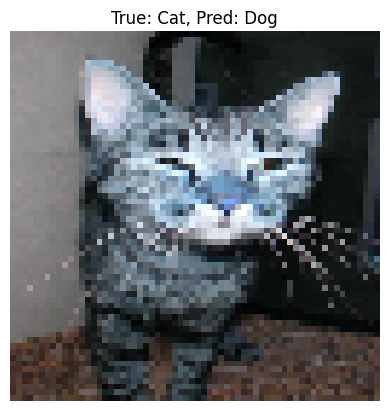

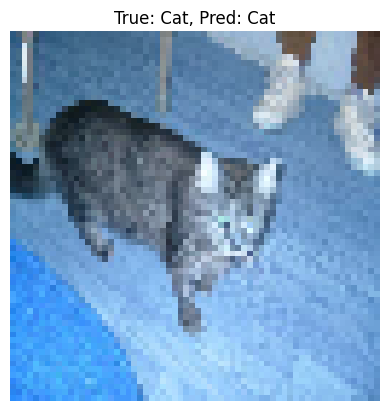

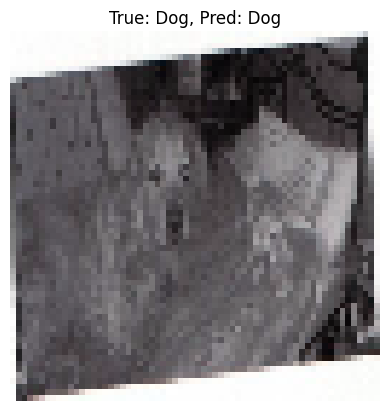

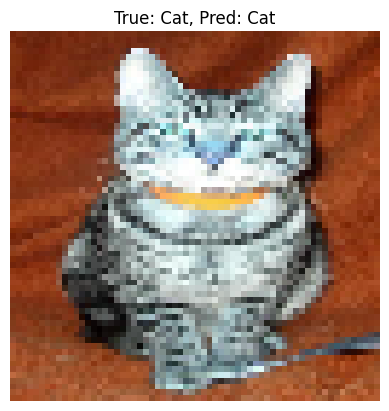

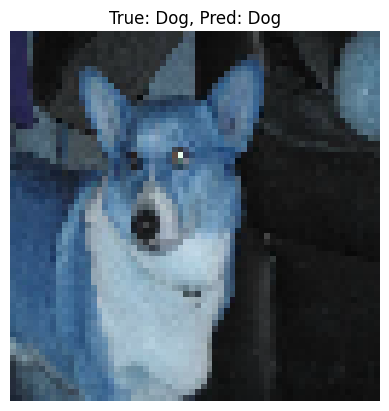

In [ ]:
import matplotlib.pyplot as plt
import random

for i in range(5):  # show 5 random images
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx].reshape(64,64,3)
    true_label = "Cat" if y_test[idx]==0 else "Dog"
    pred_label = "Cat" if y_test_pred[idx]==0 else "Dog"

    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis("off")
    plt.show()
